In [1]:
import phi; phi.verify()
from tqdm.notebook import trange

PhiFlow 3.2.0 at c:\Users\egeoz\Imperial\DA-RL\.venv\Lib\site-packages\phi
Web interface: Dash not installed. Will fallback to console interface. To install dash, run  $ pip install dash



In [2]:
from phi.jax.flow import *

In [ ]:
cylinder = geom.infinite_cylinder(x=20, y=50, radius=10, inf_dim='z')
plot({"Top view": cylinder['x,y'], "Side view": cylinder['x,z']}) # the warnings are caused by plotting

In [12]:
@jit_compile
def step(v, p, dt=1.):
    v = advect.semi_lagrangian(v, v, dt)
    return fluid.make_incompressible(v, cylinder, Solve(x0=p))

boundary = {'x-': vec(x=2, y=0, z=0), 'x+': ZERO_GRADIENT, 'y': PERIODIC, 'z': PERIODIC}
v0 = StaggeredGrid((8., 0, 0), boundary, x=128, y=64, z=8, bounds=Box(x=200, y=100, z=5))
v0, p0 = fluid.make_incompressible(v0, cylinder, Solve())
v_trj, p_trj = iterate(step, batch(time=20), v0, p0)

In [13]:
v_trj_2d = v_trj[{'z': 4, 'vector': 'x,y'}]
plot(v_trj_2d.time[1:].curl(), animate='time')

<Figure size 640x480 with 0 Axes>

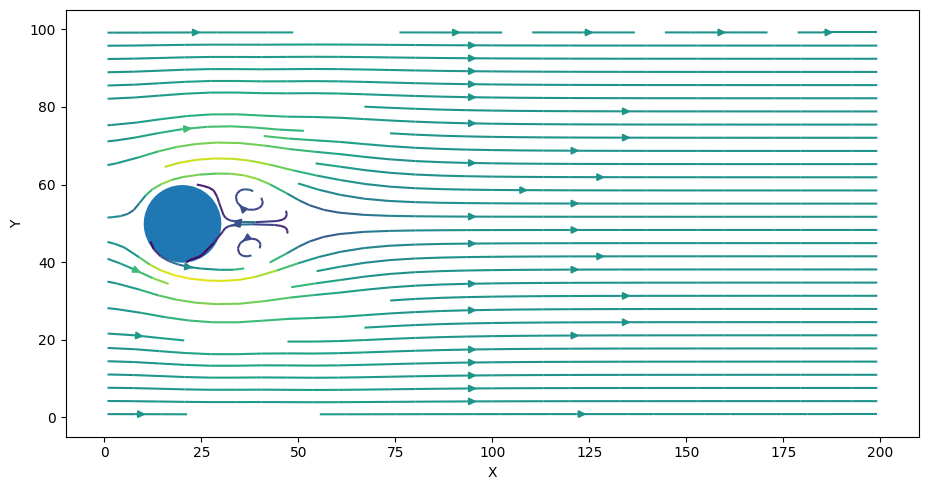

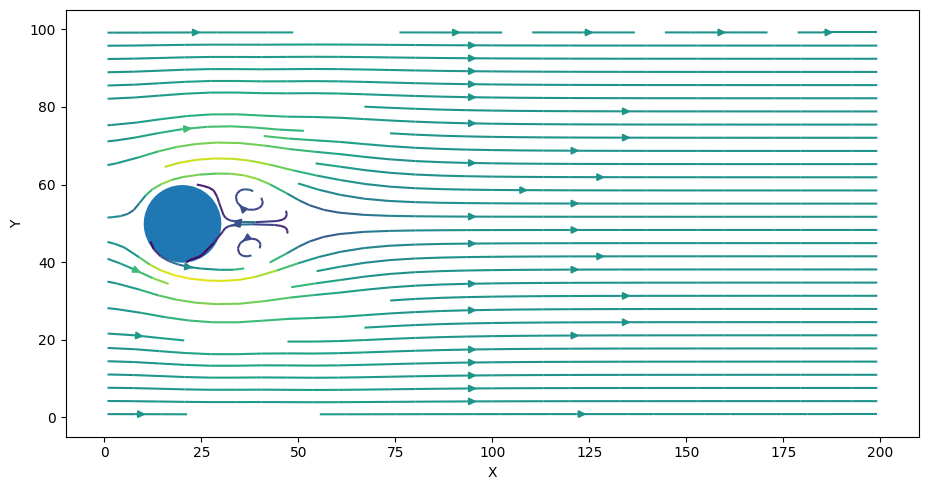

In [14]:
plot(v_trj_2d.time[-1], cylinder['x,y'], overlay='args')

In [20]:
@jit_compile
def step(v, dt=.5):
    v = diffuse.implicit(v, 0.1, dt=dt)
    v = advect.semi_lagrangian(v, v, dt=dt)
    return v

v0 = CenteredGrid(Noise(smoothness=1.5), PERIODIC, x=64, bounds=Box(x=64))
v_trj = iterate(step, batch(time=100), v0)
plot(v_trj, animate='time')

<Figure size 640x480 with 0 Axes>

In [21]:
v0 = CenteredGrid(Noise(vector='x,y'), PERIODIC, x=64, y=64, bounds=Box(x=40, y=20))
v_trj = iterate(step, batch(time=100), v0)
plot(v_trj.as_points(), animate='time')

<Figure size 640x480 with 0 Axes>